In [7]:
from ppopt.mpmodel import MPModeler
from ppopt.mp_solvers.solve_mpqp import solve_mpqp, mpqp_algorithm
from ppopt.plot import parametric_plot_1D
from ppopt.plot import parametric_plot
from ppopt.mpqp_program import MPLP_Program
import numpy

In [8]:
A = numpy.array([[1, 1, 0, 0], [0, 0, 1, 1], [-1, 0, -1, 0], [0, -1, 0, -1], [-1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, -1]])
b = numpy.array([350, 600, 0, 0, 0, 0, 0, 0]).reshape(8, 1)
c = numpy.array([178, 187, 187, 151]).reshape(-1,1)
F = numpy.array([[0, 0], [0, 0], [-1, 0], [0, -1], [0, 0], [0, 0], [0, 0], [0, 0]])
CRa = numpy.vstack((numpy.eye(2), -numpy.eye(2)))
CRb = numpy.array([1000, 1000, 0, 0]).reshape(4, 1)
H = numpy.zeros((A.shape[1],F.shape[1]))

prog = MPLP_Program(A, b, c, H, CRa, CRb, F)

In [9]:
# # make a mpp modeler
# m = MPModeler()
# 
# # add variables and parameter
# u = m.add_var(name='u')
# z = m.add_var(name='z')
# t1 = m.add_param(name='t1')
# t3 = m.add_param(name='t3')
# t5 = m.add_param(name='t5')
# t8 = m.add_param(name='t8')
# 
# # add operability constraints
# m.add_constr(-z/1.5 - u <= 350 - t3)
# m.add_constr(-0.5*z - u <= -1388.5 + 0.75*t1 + t3 + t5)
# m.add_constr(z - u <= -2830 +1.5*t1 + 2*t3 + t5 + 2*t8)
# m.add_constr(z - u <= -2044 + 1.5*t1 + 2*t3 + t5)
# m.add_constr(-z - u <= 3153 - 1.5*t1 - 2*t3 - t5 - 3*t8)
# 
# # add constraints on the uncertainty
# m.add_constr(t1 <= 630)
# m.add_constr(t1 >= 610)
# m.add_constr(t3 <= 398)
# m.add_constr(t3 >= 378)
# m.add_constr(t5 <= 593)
# m.add_constr(t5 >= 573)
# m.add_constr(t8 <= 323)
# m.add_constr(t8 >= 303)
# 
# # set objective
# m.set_objective(u)
# 
# # formulate the model
# prob = m.formulate_problem()
# prob.process_constraints()

In [10]:
solution = solve_mpqp(prog, mpqp_algorithm.combinatorial)

In [11]:
solution

Solution(program=<ppopt.mplp_program.MPLP_Program object at 0x000001F0D5846F50>, critical_regions=[Critical region with active set [0, 2, 3, 5]
The Omega Constraint indices are [1]
The Lagrange multipliers Constraint indices are []
The Regular Constraint indices are [[0, 2, 3], [1, 6, 7]]
  x(θ) = Aθ + b 
 λ(θ) = Cθ + d 
  Eθ <= f
 A = [[ 4.58048712e-16 -1.06619662e-16]
 [ 1.06022803e-16  1.77142197e-16]
 [ 1.00000000e+00  1.28197512e-16]
 [-1.28197512e-16  1.00000000e+00]] 
 b = [[ 3.50000000e+02]
 [-6.86915451e-14]
 [-3.50000000e+02]
 [ 0.00000000e+00]] 
 C = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 
 d = [[ 12.72792206]
 [323.89350102]
 [261.53967194]
 [ 45.        ]] 
 E = [[ 7.07106781e-01  7.07106781e-01]
 [-1.00000000e+00 -1.28197512e-16]
 [ 1.28197512e-16 -1.00000000e+00]
 [-0.00000000e+00 -1.00000000e+00]] 
 f = [[ 671.75144213]
 [-350.        ]
 [   0.        ]
 [   0.        ]], Critical region with active set [1, 2, 3, 6]
The Omega Constraint indices are [0]
The Lagrange multip

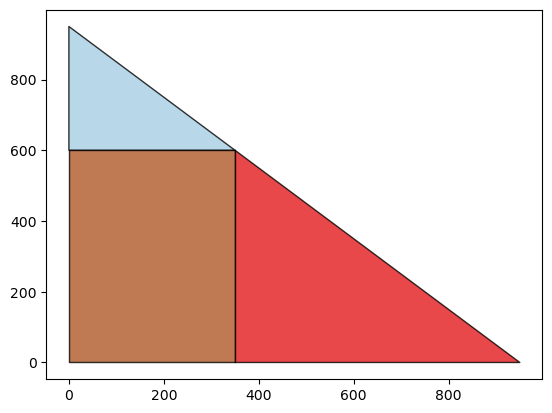

In [12]:
parametric_plot(solution, save_path='transport', save_format='svg', show=True)